In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline

In [3]:
train = pd.read_csv("./input/Train/train.csv")
test = pd.read_csv("./input/Test/test.csv")

print("shape of train: ", train.shape, "shape of test: ", test.shape)

shape of train:  (7767, 563) shape of test:  (3162, 563)


In [4]:
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


Observation: Train data and test data is divided in approximately 70:30. There are no missing values.

### Visualizations for Train data

In [4]:
print(train.Activity.value_counts())

STANDING              1423
LAYING                1413
SITTING               1293
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     987
STAND_TO_LIE            90
SIT_TO_LIE              75
LIE_TO_SIT              60
LIE_TO_STAND            57
STAND_TO_SIT            47
SIT_TO_STAND            23
Name: Activity, dtype: int64


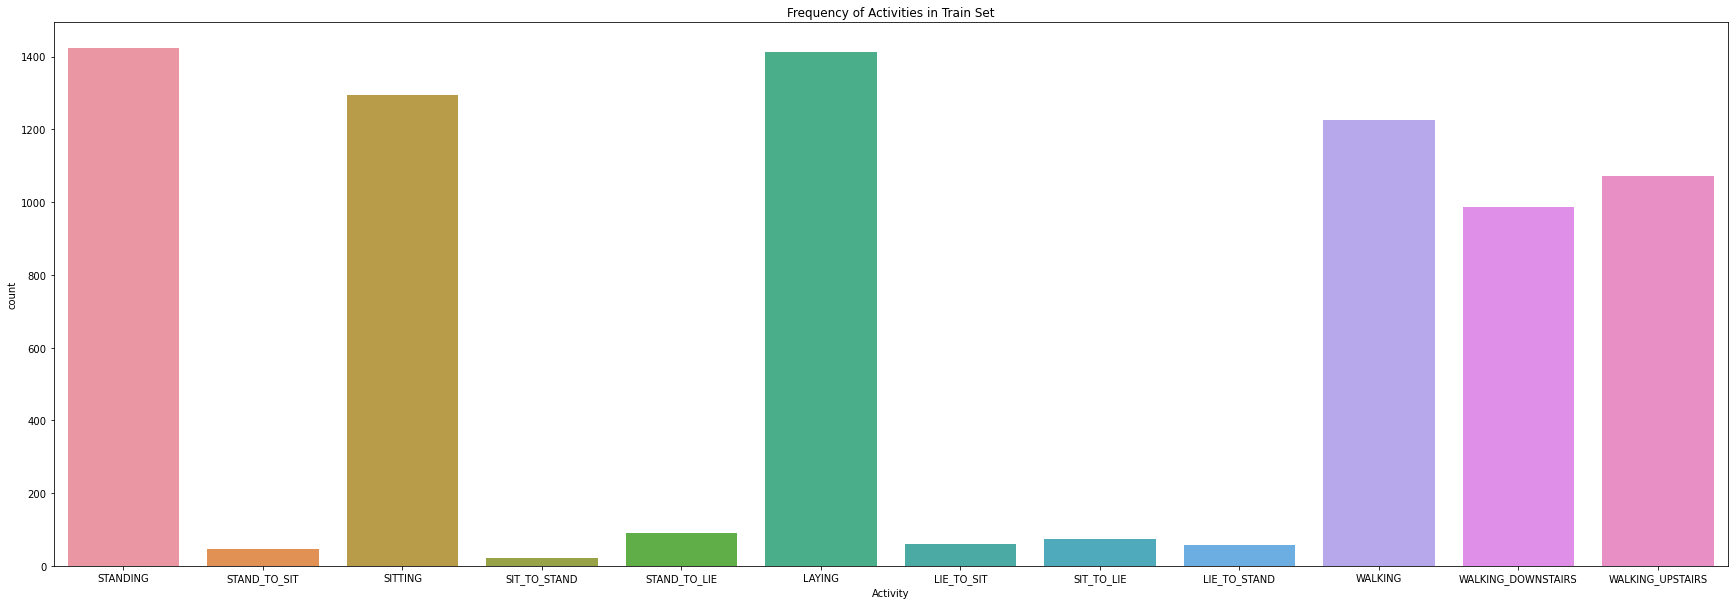

In [5]:
plt.figure(figsize = (30,10))
sns.countplot(x=train.Activity)
plt.xlabel('Activity')
plt.ylabel('count')
plt.title('Frequency of Activities in Train Set')
plt.show()

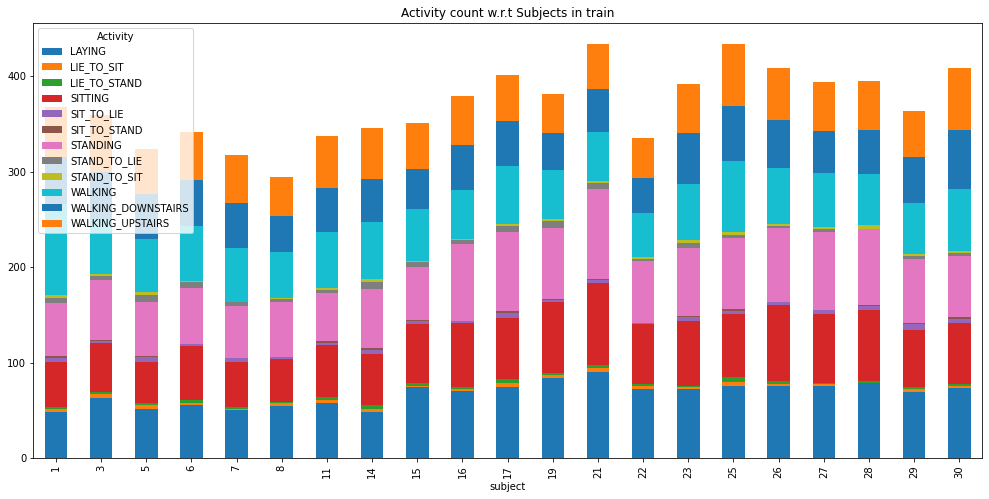

In [6]:
# Stacked Bar Chart for different activities with regards to subjects

stack_group = train.groupby(['subject', 'Activity']).size().unstack()
stack_group.plot(kind='bar', stacked=True, figsize=(17, 8), title = 'Activity count w.r.t Subjects in train')
plt.show()

### Visualizations for Test data

In [ ]:
print(test.Activity.value_counts())

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x=test.Activity)
plt.xlabel('Activity')
plt.ylabel('count')
plt.title('Frequency of Activities in test')
plt.show()

In [ ]:
# Stacked Bar Chart for different activities with regards to subjects

stack_group = test.groupby(['subject', 'Activity']).size().unstack()
stack_group.plot(kind='bar', stacked=True, figsize=(17, 8), title = 'Activity count w.r.t Subjects in test')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# First, we need to standardize the data to get better performance
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

train_features, validation_features, train_labels, validation_labels = train_test_split(x, y, test_size=0.25, random_state=1300)

targets = train['Activity'].unique()

train_labels = pd.DataFrame(train_labels, columns=['Activity'])
validation_labels = pd.DataFrame(validation_labels, columns=['Activity'])

### Principal Component Analysis (PCA)
We want to use PCA to reduce the the multidimension features in our data into fewer dimensions to better understand the data distribution. We are interested to find out whether the classes are separable using these selected principal components.

#### 2 Components PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(train_features)
principalDf = pd.DataFrame(data = X_train
             , columns = ['PC1', 'PC2'])

In [ ]:
finalDf = pd.concat([principalDf, train_labels], axis = 1)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA with 2 components', fontsize = 20)

for target in targets:
    indicesToKeep = finalDf['Activity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

From the result above we can see that the first principal component contains 48.08% of the variance and the second principal component contains 8.11% of the variance. Together, the two components contain 56.19% of the information, which is not very representative. The classes are also overlapping.

#### 3 Components PCA

In [ ]:
pca3 = PCA(n_components=3)
PC3 = pca3.fit_transform(x)
principalDf3 = pd.DataFrame(data = PC3
             , columns = ['PC1', 'PC2', 'PC3'])

In [ ]:
finalDf3 = pd.concat([principalDf3, train[['Activity']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('PCA with 3 components', fontsize = 20)
targets = train['Activity'].unique()

for target in targets:
    indicesToKeep = finalDf3['Activity'] == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'PC1']
               , finalDf3.loc[indicesToKeep, 'PC2']
               , finalDf3.loc[indicesToKeep, 'PC3']
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
PC3.shape

In [ ]:
pca3.explained_variance_ratio_

From the variance ratio above we can see that the first principal component contains 48.15% of the variance and the second principal component contains 8.08% of the variance, and the third principal component contains 3.19% of the variance. Together, the three components contain 59.42% of the information, which is still considerably small. The classes are again overlapping.

In [ ]:
pca_n = PCA(n_components=120)
PCN = pca_n.fit_transform(x)

In [ ]:
PCN.shape

In [ ]:
np.sum(pca_n.explained_variance_ratio_)

### Isomap Embedding

In [ ]:
# First, we need to standardize the data to get better performance
from sklearn.preprocessing import StandardScaler
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.manifold import Isomap as ISO

iso = ISO(n_components = 2)
isomap = iso.fit_transform(x)
isomapTempDf = pd.DataFrame(data = isomap, columns = ["ISO1", "ISO2"])

In [ ]:
isomapFinalDf = pd.concat([isomapTempDf, train[['Activity']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('ISO1', fontsize = 15)
ax.set_ylabel('ISO2', fontsize = 15)
ax.set_title('Isomap Embedding', fontsize = 20)
targets = train['Activity'].unique()

for target in targets:
    indicesToKeep = isomapFinalDf['Activity'] == target
    ax.scatter(isomapFinalDf.loc[indicesToKeep, 'ISO1']
               , isomapFinalDf.loc[indicesToKeep, 'ISO2']
               , s = 30
               , alpha = 0.5)
ax.legend(targets)
ax.grid()

In [ ]:
isomap.shape

### t-Distributed Stochastic Neighbour Embedding (t-SNE)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 50, n_iter = 2500)
tsne_results = tsne.fit_transform(train_features)

df_subset = pd.DataFrame(columns = ['tsne-2d-one','tsne-2d-two', 'Activities'])
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]
df_subset['Activities'] = train_labels

In [ ]:
plt.figure(figsize = (16, 10))
plt.title('t-SNE with 2 Components')

sns.scatterplot(
    x = "tsne-2d-one", y = "tsne-2d-two",
    hue = "Activities",
    palette = "bright",
    data = df_subset,
    legend = "full",
    alpha = 0.3
)

plt.show()

In [ ]:
tsne_results.shape

In [39]:
pca = PCA(n_components=120, random_state = 1300)  
X_train = pca.fit_transform(train_features)  
X_val = pca.transform(validation_features) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, train_labels)

In [ ]:
dt.score(X_val, validation_labels)

In [ ]:
dt.score(X_train, train_labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Based on number of trees
clf_RF_n = [RandomForestClassifier(n_estimators = 50, random_state  = 1300),
            RandomForestClassifier(n_estimators = 150, random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, random_state  = 1300),
            RandomForestClassifier(n_estimators = 400, random_state  = 1300),
            RandomForestClassifier(n_estimators = 500, random_state  = 1300)]

In [ ]:
from sklearn.metrics import accuracy_score
from timeit import default_timer as timer

acc_RF_n = []
ex_time_RF_n = []

for clf in clf_RF_n:
    start_time = timer()
    fit = clf.fit(X_train, np.ravel(train_labels))
    pred = fit.predict(X_val)
    accuracy = accuracy_score(validation_labels, pred)
    elapsed = timer() - start_time
    
    ex_time_RF_n.append(elapsed)
    acc_RF_n.append(accuracy)

In [ ]:
acc_RF_n

In [ ]:
# Graphical Representation of ACCURACY and EXECUTION Time for RANDOM FOREST CLASSIFIER

label = ('n=50','n=150','n=200','n=400','n=500')
Accu = acc_RF_n
ExTime = ex_time_RF_n

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

In [ ]:
clf_RF_d = [RandomForestClassifier(n_estimators = 200, max_depth = 10, random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, max_depth = 20, random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, max_depth = 40, random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, max_depth = 50,random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, max_depth = 70, random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, max_depth = 200, random_state  = 1300)]

In [ ]:
ex_time_RF_d = []
acc_RF_d = []

for clf in clf_RF_d :
    start_time = timer()
    fit = clf.fit(X_train, np.ravel(train_labels))
    pred = fit.predict(X_val)
    accuracy = accuracy_score(validation_labels, pred)
    elapsed = timer() - start_time
    
    ex_time_RF_d.append(elapsed)
    acc_RF_d.append(accuracy)

In [ ]:
# Graphical Representation of ACCURACY and Execution Time for Random Forest with n = 200 and different max depths of a tree.

label = ('d =10','d =20','d =40','d =50','d =70', ' d =200')
Accu = acc_RF_d
ExTime = ex_time_RF_d


plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

# Comparing performance for different methods of dimensionality reduction

1. PCA

In [ ]:
# Measure the accuracy using Random Forest Classifier, number of tree = 140, maximum depth = 40, random seed = 1300
# data is transformed with PCA

from sklearn.ensemble import RandomForestClassifier as RFC
label = ["Activity"]
features = list(train.columns)[:-1]

# varying number of features for PCA

def n_PCA(n):
    pca = PCA(n_components = n, random_state = 1300)
    X_train = pca.fit_transform(train_features)
    X_validation = pca.transform(validation_features)
    return X_train, X_validation #return the transformed data both train and validation

accuracy = []

for i in range(2, 10):
    X_train, X_validation = n_PCA(i)
    y_train, y_validation = train_labels.values.ravel(), validation_labels.values.ravel()
    rfc = RFC(n_estimators = 140, max_depth = 40, random_state = 1300)
    model = rfc.fit(X_train, y_train)
    rfc_accuracy = model.score(X_validation, y_validation)
    accuracy.append([i, rfc_accuracy])
    
for i in range(10, 200, 10):
    X_train, X_validation = n_PCA(i)
    y_train, y_validation = train_labels.values.ravel(), validation_labels.values.ravel()
    rfc = RFC(n_estimators = 140, max_depth = 40, random_state = 1300)
    model = rfc.fit(X_train, y_train)
    rfc_accuracy = model.score(X_validation, y_validation)
    accuracy.append([i, rfc_accuracy])


    

In [ ]:
# Plotting the accuracy vs number of PCA features
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(list(map(lambda x: x[0], accuracy)), list(map(lambda x: x[1], accuracy)), color = "r")
plt.xlabel("Number of features in PCA")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Features in PCA")
plt.show()

In [ ]:
# highest accuracy with PCA

max_accuracy_PCA = max(accuracy, key = lambda x:x[1])
print("maximum accuracy attained at n = ", max_accuracy_PCA[0], "\nwith the accuracy of = ", max_accuracy_PCA[1])

2. T-SNE

In [ ]:
# data is transform using t-SNE
from sklearn.manifold import TSNE

def n_TSNE(n, perplexity):
    tsne = TSNE(n_components = n, perplexity = perplexity, n_iter = 2500, random_state = 1300)
    train_validation_combined = np.append(train_features, validation_features, axis = 0)
    X_combined = tsne.fit_transform(train_validation_combined)
    X_train, X_validation = X_combined[:len(train_features)], X_combined[len(train_features):] 
    return X_train, X_validation #return the transformed data both train and validation

# Model accuracy with Random Forest Classifier

X_train, X_validation = n_TSNE(2, 50)
y_train, y_validation = train_labels.values.ravel(), validation_labels.values.ravel()
rfc = RFC(n_estimators = 140, max_depth = 40, random_state = 1300)
model = rfc.fit(X_train, y_train)
rfc_accuracy = model.score(X_validation, y_validation)
print(rfc_accuracy)

3. Isomap Embedding

In [ ]:
# data is transformed using ISOMAP embedding
from sklearn.manifold import Isomap

def n_isomap(n, neighbors):
    iso = Isomap(n_components = n, n_neighbors = neighbors)
    X_train = iso.fit_transform(train_features)
    X_validation = iso.transform(validation_features)
    return X_train, X_validation

accuracy_isomap = []
for i in range(2, 10):
    X_train, X_validation = n_isomap(i, 5)
    y_train, y_validation = train_labels.values.ravel(), validation_labels.values.ravel()
    rfc = RFC(n_estimators = 140, max_depth = 40, random_state = 1300)
    model = rfc.fit(X_train, y_train)
    rfc_accuracy = model.score(X_validation, y_validation)
    print(rfc_accuracy)
    accuracy_isomap.append(rfc_accuracy)

for i in range(10, 200, 10):
    X_train, X_validation = n_isomap(i, 5)
    y_train, y_validation = train_labels.values.ravel(), validation_labels.values.ravel()
    rfc = RFC(n_estimators = 140, max_depth = 40, random_state = 1300)
    model = rfc.fit(X_train, y_train)
    rfc_accuracy = model.score(X_validation, y_validation)
    print(rfc_accuracy)
    accuracy_isomap.append(rfc_accuracy)


In [ ]:
# Plotting the accuracy vs number of PCA features
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
x_values = list(range(2,10)) + list(range(10, 200, 10))
plt.plot(x_values, accuracy_isomap, color = "r")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Features")
plt.show()

In [ ]:
# highest accuracy with PCA

max_accuracy_iso = max(accuracy_isomap)
print("maximum accuracy attained at n = ", x_values[accuracy_isomap.index(max_accuracy_iso)], "\nwith the accuracy of = ", max_accuracy_iso)

## Comparing RF Performance on PCA Data Before and After Handling Imbalance Data

In [51]:
# Import necessary package
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from timeit import default_timer as timer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### Random Forest Performance on PCA of Original Data

In [61]:
# First, we need to standardize the data to get better performance
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

train_features, validation_features, train_labels, validation_labels = train_test_split(x, y, test_size=0.25, random_state=1300)

targets = train['Activity'].unique()

train_labels = pd.DataFrame(train_labels, columns=['Activity'])
validation_labels = pd.DataFrame(validation_labels, columns=['Activity'])

In [62]:
pca = PCA(n_components=120, random_state = 1300)  
X_train = pca.fit_transform(train_features)  
X_val = pca.transform(validation_features) 

In [63]:
clf = RandomForestClassifier(n_estimators = 150, max_depth = 40, random_state = 1300)

start_time = timer()
fit = clf.fit(X_train, np.ravel(train_labels))
pred = fit.predict(X_val)

# Activity label
activity_label = pd.Series(test.Activity.values).unique()

# Get evaluation metric
accuracy = accuracy_score(validation_labels, pred)
elapsed = timer() - start_time
f1 = f1_score(validation_labels, pred, average = None, labels = activity_label)
avgf1 = f1_score(validation_labels, pred, average = "micro") #Using micro as labels are under represented
recall = recall_score(validation_labels, pred, average = None, labels = activity_label)
avgrecall = recall_score(validation_labels, pred, average = "micro") #Using micro as labels are under represented
precision = precision_score(validation_labels, pred, average = None, labels = activity_label)
avgprec = precision_score(validation_labels, pred, average = "micro") #Using micro as labels are under represented

print("Accuracy of feature Set: ", accuracy)
print("Average Precision Score of feature Set: ", avgprec)
print("Average Recall Score of feature Set: ", avgrecall)
print("Average F1 Score of feature Set: ", avgf1)
print("Run Time of feature Set:", elapsed)

Accuracy of feature Set:  0.9294541709577755
Average Precision Score of feature Set:  0.9294541709577755
Average Recall Score of feature Set:  0.9294541709577755
Average F1 Score of feature Set:  0.9294541709577755
Run Time of feature Set: 8.44469140000001


## Handling Imbalance Data with Over Sampling
### 1. SMOTE
#### Add synthetic data

In [64]:
from imblearn.over_sampling import SMOTE

# Separating out the features for training data
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

# applying smote on training and test data
smt = SMOTE()
xtrain_sm, ytrain_sm= smt.fit_resample(x, y)

# Standardizing the features
xtrain_sm = StandardScaler().fit_transform(xtrain_sm)

train_features, validation_features, train_labels, validation_labels = train_test_split(xtrain_sm, ytrain_sm, test_size=0.25, random_state=1300)

train_labels = pd.DataFrame(train_labels, columns=['Activity'])
validation_labels = pd.DataFrame(validation_labels, columns=['Activity'])

#### Perform PCA on SMOTE Data

In [65]:
pca = PCA(n_components=120, random_state = 1300)  
X_train = pca.fit_transform(train_features)  
X_val = pca.transform(validation_features) 

#### Perform Random Forest on PCA SMOTE Data

In [66]:
clf = RandomForestClassifier(n_estimators = 150, max_depth = 40, random_state = 1300)

start_time = timer()
fit = clf.fit(X_train, np.ravel(train_labels))
pred = fit.predict(X_val)

# Activity label
activity_label = pd.Series(test.Activity.values).unique()

# Get evaluation metric
accuracy = accuracy_score(validation_labels, pred)
elapsed = timer() - start_time
f1 = f1_score(validation_labels, pred, average = None, labels = activity_label)
avgf1 = f1_score(validation_labels, pred, average = "micro") #Using micro as labels are under represented
recall = recall_score(validation_labels, pred, average = None, labels = activity_label)
avgrecall = recall_score(validation_labels, pred, average = "micro") #Using micro as labels are under represented
precision = precision_score(validation_labels, pred, average = None, labels = activity_label)
avgprec = precision_score(validation_labels, pred, average = "micro") #Using micro as labels are under represented

print("Accuracy of feature Set: ", accuracy)
print("Average Precision Score of feature Set: ", avgprec)
print("Average Recall Score of feature Set: ", avgrecall)
print("Average F1 Score of feature Set: ", avgf1)
print("Run Time of feature Set:", elapsed)

Accuracy of feature Set:  0.9714218786601078
Average Precision Score of feature Set:  0.9714218786601078
Average Recall Score of feature Set:  0.9714218786601078
Average F1 Score of feature Set:  0.9714218786601078
Run Time of feature Set: 17.308450800000173


### 2. ADASYN
#### Add synthetic data

In [67]:
from imblearn.over_sampling import SMOTE

# Separating out the features for training data
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values

# applying smote on training and test data
adasyn = ADASYN()
xtrain_sm, ytrain_sm= adasyn.fit_resample(x, y)

# Standardizing the features
xtrain_sm = StandardScaler().fit_transform(xtrain_sm)

train_features, validation_features, train_labels, validation_labels = train_test_split(xtrain_sm, ytrain_sm, test_size=0.25, random_state=1300)

train_labels = pd.DataFrame(train_labels, columns=['Activity'])
validation_labels = pd.DataFrame(validation_labels, columns=['Activity'])

#### Perform PCA on ADASYN Data  

In [68]:
pca = PCA(n_components=120, random_state = 1300)  
X_train = pca.fit_transform(train_features)  
X_val = pca.transform(validation_features) 

#### Perform Random Forest on PCA ADASYN Data

In [69]:
clf = RandomForestClassifier(n_estimators = 150, max_depth = 40, random_state = 1300)

start_time = timer()
fit = clf.fit(X_train, np.ravel(train_labels))
pred = fit.predict(X_val)

# Activity label
activity_label = pd.Series(test.Activity.values).unique()

# Get evaluation metric
accuracy = accuracy_score(validation_labels, pred)
elapsed = timer() - start_time
f1 = f1_score(validation_labels, pred, average = None, labels = activity_label)
avgf1 = f1_score(validation_labels, pred, average = "micro") #Using micro as labels are under represented
recall = recall_score(validation_labels, pred, average = None, labels = activity_label)
avgrecall = recall_score(validation_labels, pred, average = "micro") #Using micro as labels are under represented
precision = precision_score(validation_labels, pred, average = None, labels = activity_label)
avgprec = precision_score(validation_labels, pred, average = "micro") #Using micro as labels are under represented

print("Accuracy of feature Set: ", accuracy)
print("Average Precision Score of feature Set: ", avgprec)
print("Average Recall Score of feature Set: ", avgrecall)
print("Average F1 Score of feature Set: ", avgf1)
print("Run Time of feature Set:", elapsed)

Accuracy of feature Set:  0.9750529536361496
Average Precision Score of feature Set:  0.9750529536361496
Average Recall Score of feature Set:  0.9750529536361496
Average F1 Score of feature Set:  0.9750529536361496
Run Time of feature Set: 16.08894820000023


# Feature Selection / Extraction

1. Using Recursive Feature Elimination

In [121]:
#Import package used

from sklearn.feature_selection import RFE
from timeit import default_timer as timer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [122]:
# First, we need to standardize the data to get better performance
features = train.columns.values.tolist()
features.remove('Activity')

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train['Activity']

# Standardizing the features
x = StandardScaler().fit_transform(x)

train_features, validation_features, train_labels, validation_labels = train_test_split(x, y, test_size=0.25, random_state=1300)

#train_labels = pd.DataFrame(train_labels, columns=['Activity'])
#validation_labels = pd.DataFrame(validation_labels, columns=['Activity'])

#List of labels
activity_label = pd.Series(test.Activity.values).unique()

activity_label_fixed = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

activity_label_moving = ['STAND_TO_SIT', 'SIT_TO_STAND',
       'STAND_TO_LIE', 'LIE_TO_SIT', 'SIT_TO_LIE',
       'LIE_TO_STAND']

In [23]:
#Use RandomForest to do the recursive feature elimination
 
model = RandomForestClassifier(n_estimators = 150, max_depth = 40, max_features= 'log2', random_state = 1300)
estimator = RandomForestClassifier()

# Use timer to see how long this will take to run
# Run RFE with the model to determine the best 50 features
start_time = timer()
rfe = RFE(model, n_features_to_select = 50) #n = 50 from the analysis above
selector = rfe.fit(train_features, train_labels)

elapsed_time = timer() - start_time #Takes around 1hr - 2hrs to run

In [24]:
selector.support_
print(elapsed_time)

3894.4909807000004


## Evaluation for the new dataset with only the 50 selected features

In [26]:
#transform the data to only have the 50 selected features
x_rfe = selector.transform(train_features)

xval_rfe = selector.transform(validation_features)

In [54]:
pd.DataFrame(x_rfe, columns = pd.DataFrame(features)[selector.support_])

(tBodyAcc-STD-1                 ,)  (tBodyAcc-Max-1                 ,)  \
0                               0.733960                            0.788392   
1                               2.480425                            2.081670   
2                              -0.886333                           -0.865804   
3                               0.300691                            0.023266   
4                               0.933449                            1.047976   
...                                  ...                                 ...   
5820                           -0.904867                           -0.889296   
5821                           -0.808955                           -0.764640   
5822                            0.734108                            0.599937   
5823                           -0.901444                           -0.883719   
5824                            1.928064                            1.899996   

      (tBodyAcc-Energy-1              ,)  (tBodyAcc-Correlation-1         ,)  \
0                               0.270995                           -0.178008   
1                               3.406885                           -0.875784   
2                              -0.702048                            1.523162   
3                              -0.173085                           -0.355237   
4                               0.516344                           -0.275728   
...                                  ...                                 ...   
5820                           -0.702383                            0.333825   
5821                           -0.698077                            0.094763   
5822                            0.270955                           -0.128994   
5823                           -0.702343                           -0.351669   
5824                            2.193005                           -1.162745   

      (tGravityAcc-Mean-1             ,)  (tGravityAcc-Mean-2             ,)  \
0                               0.581997                           -0.626164   
1                               0.521947                           -0.470697   
2                              -1.507742                            1.227665   
3                               0.286516                           -0.869471   
4                               0.304565                           -0.711426   
...                                  ...                                 ...   
5820                            0.610964                           -0.120592   
5821                            0.327331                           -0.658760   
5822                            0.537148                           -0.800971   
5823                            0.612573                           -0.296353   
5824                            0.530199                           -0.642074   

      (tGravityAcc-Mean-3             ,)  (tGravityAcc-Max-1              ,)  \
0                              -0.137211                            0.550058   
1                              -0.240237                            0.501163   
2                               2.150086                           -1.590703   
3                              -1.452850                            0.288246   
4                              -1.375107                            0.365774   
...                                  ...                                 ...   
5820                           -0.539743                            0.573500   
5821                           -1.528405                            0.292533   
5822                           -0.321906                            0.528420   
5823                           -0.075345                            0.576184   
5824                           -0.324130                            0.504777   

      (tGravityAcc-Max-2              ,)  (tGravityAcc-Max-3              ,)  \
0                              -0.666154                           -0.174446   
1 

In [145]:
clf = RandomForestClassifier(n_estimators = 150, max_depth = 40, max_features= 'log2', random_state = 1300)

start_time = timer()
fit = clf.fit(x_rfe, train_labels)
pred = fit.predict(xval_rfe)

#Get evaluation metric
accuracy = accuracy_score(validation_labels, pred)
elapsed = timer() - start_time
f1 = f1_score(validation_labels, pred, average = None, labels = activity_label)
avgf1 = f1_score(validation_labels, pred, average = "micro") #Using micro as labels are under represented
recall = recall_score(validation_labels, pred, average = None, labels = activity_label)
avgrecall = recall_score(validation_labels, pred, average = "micro") #Using micro as labels are under represented
precision = precision_score(validation_labels, pred, average = None, labels = activity_label)
avgprec = precision_score(validation_labels, pred, average = "micro") #Using micro as labels are under represented

In [146]:
print("Accuracy of feature Set: ", accuracy)
print("Average Precision Score of feature Set: ", avgprec)
print("Average Recall Score of feature Set: ", avgrecall)
print("Average F1 Score of feature Set: ", avgf1)
print("Run Time of feature Set:", elapsed)

Accuracy of feature Set:  0.9660144181256437
Average Precision Score of feature Set:  0.9660144181256437
Average Recall Score of feature Set:  0.9660144181256437
Average F1 Score of feature Set:  0.9660144181256437
Run Time of feature Set: 8.99940819999938


In [140]:
pd.DataFrame([f1] + [recall] + [precision], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

STANDING  STAND_TO_SIT   SITTING  SIT_TO_STAND  STAND_TO_LIE  \
F1 Score         0.971831      0.615385  0.963289      0.250000      0.744186   
Recall Score     0.966387      0.500000  0.976190      0.142857      0.800000   
Precision Score  0.977337      0.800000  0.950725      1.000000      0.695652   

                   LAYING  LIE_TO_SIT  SIT_TO_LIE  LIE_TO_STAND   WALKING  \
F1 Score         0.998624    0.666667    0.619048      0.551724  0.984772   
Recall Score     0.997253    0.750000    0.650000      0.444444  0.976510   
Precision Score  1.000000    0.600000    0.590909      0.727273  0.993174   

                 WALKING_DOWNSTAIRS  WALKING_UPSTAIRS  
F1 Score                   0.987013          0.985240  
Recall Score               0.991304          0.996269  
Precision Score            0.982759          0.974453

2. Using Correlation

First check if there are any constant/quasi constant features as their variance will be near or = 0


In [ ]:
# First, we need to standardize the data to get better performance
features = train.columns.values.tolist()
features.remove('Activity')
features.remove('subject') #remove subject as its a categorical feature

# Separating out the features
x = train.loc[:, features].values

# Separating out the target
y = train['Activity']

# Standardizing the features
x = StandardScaler().fit_transform(x)

train_features, validation_features, train_labels, validation_labels = train_test_split(x, y, test_size=0.25, random_state=1300)

#train_labels = pd.DataFrame(train_labels, columns=['Activity'])
#validation_labels = pd.DataFrame(validation_labels, columns=['Activity'])

#List of labels
activity_label = pd.Series(test.Activity.values).unique()

activity_label_fixed = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

activity_label_moving = ['STAND_TO_SIT', 'SIT_TO_STAND',
       'STAND_TO_LIE', 'LIE_TO_SIT', 'SIT_TO_LIE',
       'LIE_TO_STAND']

In [106]:
#Variance 0 means constant
check_constant = VarianceThreshold(0)
check_constant.fit(train_features)

VarianceThreshold(threshold=0)

In [107]:
check_constant.get_support().sum() # = 561, so no constant features dropped

561

In [108]:
#Next check for quasi constant (values are very close and is likely noise)

check_quasi = VarianceThreshold(0.01)
check_quasi.fit(train_features)

VarianceThreshold(threshold=0.01)

In [109]:
check_quasi.get_support().sum() # = 561, so no quasi features dropped

561

In [110]:
#Next check for duplicates

dup = pd.DataFrame(train_features)
dup.duplicated().sum() # = 0, so no duplicates as well

0

In [111]:
corrmat = pd.DataFrame(train_features, columns = features).corr()

In [112]:
#Viewing the correlations
corrmat

tBodyAcc-Mean-1                  \
tBodyAcc-Mean-1                                         1.000000   
tBodyAcc-Mean-2                                        -0.603429   
tBodyAcc-Mean-3                                        -0.627242   
tBodyAcc-STD-1                                          0.021005   
tBodyAcc-STD-2                                         -0.030296   
...                                                          ...   
tBodyGyro-AngleWRTGravity-1                            -0.057934   
tBodyGyroJerk-AngleWRTGravity-1                         0.036937   
tXAxisAcc-AngleWRTGravity-1                             0.121258   
tYAxisAcc-AngleWRTGravity-1                            -0.090461   
tZAxisAcc-AngleWRTGravity-1                            -0.081239   

                                 tBodyAcc-Mean-2                  \
tBodyAcc-Mean-1                                        -0.603429   
tBodyAcc-Mean-2                                         1.000000   
tBodyAcc-Mean-3                                         0.453520   
tBodyAcc-STD-1                                         -0.018774   
tBodyAcc-STD-2                                          0.043076   
...                                                          ...   
tBodyGyro-AngleWRTGravity-1                             0.073600   
tBodyGyroJerk-AngleWRTGravity-1                         0.020952   
tXAxisAcc-AngleWRTGravity-1                            -0.089735   
tYAxisAcc-AngleWRTGravity-1                             0.077405   
tZAxisAcc-AngleWRTGravity-1                             0.042830   

                                 tBodyAcc-Mean-3                  \
tBodyAcc-Mean-1                                        -0.627242   
tBodyAcc-Mean-2                                         0.453520   
tBodyAcc-Mean-3                                         1.000000   
tBodyAcc-STD-1                                         -0.011024   
tBodyAcc-STD-2                                          0.059024   
...                                                          ...   
tBodyGyro-AngleWRTGravity-1                             0.017697   
tBodyGyroJerk-AngleWRTGravity-1                        -0.015212   
tXAxisAcc-AngleWRTGravity-1                            -0.074793   
tYAxisAcc-AngleWRTGravity-1                             0.031936   
tZAxisAcc-AngleWRTGravity-1                             0.070395   

                                 tBodyAcc-STD-1                   \
tBodyAcc-Mean-1                                         0.021005   
tBodyAcc-Mean-2                                        -0.018774   
tBodyAcc-Mean-3                                        -0.011024   
tBodyAcc-STD-1                                          1.000000   
tBodyAcc-STD-2                                          0.878006   
...                                                          ...   
tBodyGyro-AngleWRTGravity-1                            -0.001405   
tBodyGyroJerk-AngleWRTGravity-1                        -0.011616   
tXAxisAcc-AngleWRTGravity-1                            -0.342445   
tYAxisAcc-AngleWRTGravity-1                             0.421600   
tZAxisAcc-AngleWRTGravity-1                             0.367638   

                                 tBodyAcc-STD-2                   \
tBodyAcc-Mean-1                                        -0.030296   
tBodyAcc-Mean-2                                         0.043076   
tBodyAcc-Mean-3                                         0.059024   
tBodyAcc-STD-1                                          0.878006   
tBodyAcc-STD-2                                          1.000000   
...                                                          ...   
tBodyGyro-AngleWRTGravity-1                            -0.014549   
tBodyGyroJerk-AngleWRTGravity-1                         0.004560   
tXAxisAcc-AngleWRTGravity-1                            -0.332680   
tYAxisAcc-AngleWRTGravity-1                             0.424474   
tZAxisAcc-AngleWR

<AxesSubplot:>

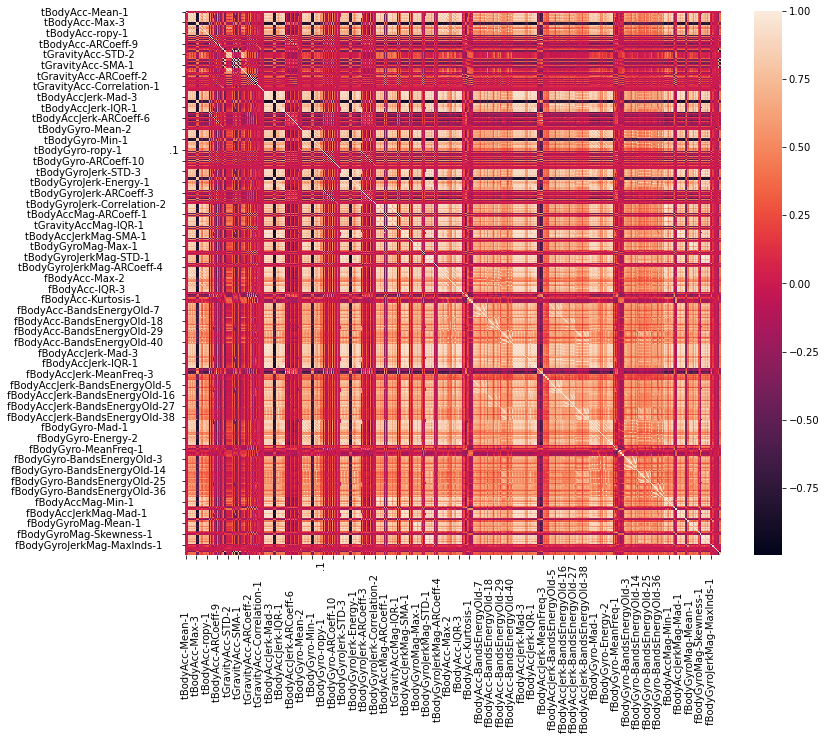

In [113]:
#Plotting the correlation as a heatmap for a better visualization
plt.figure(figsize = (12,10))
sns.heatmap(corrmat)

In [114]:
# Define a function to filter out the features that are highly correlated to each other

def get_high_corr(cormat, th):
    high_corr_feature = set()
    for i in range(len(cormat)):
        for j in range(i):
            if abs(cormat.iloc[i,j]) >= th and not (cormat.columns[j] in high_corr_feature):
                cname = cormat.columns[i]
                high_corr_feature.add(cname)
    return high_corr_feature

In [115]:
#Use the function to get the list of highly correlated features

high_corr_features = get_high_corr(corrmat, 0.85)

In [116]:
len(high_corr_features) # = 353 highyly correlated features

353

In [117]:
#Drop these highly correlated features

filtered_train_features = pd.DataFrame(train_features, columns = features).drop(labels = high_corr_features, axis = 1)
filtered_val_features = pd.DataFrame(validation_features, columns = features).drop(labels = high_corr_features, axis = 1)

In [118]:
filtered_train_features

tBodyAcc-Mean-1                  tBodyAcc-Mean-2                  \
0                            0.260026                        -0.242860   
1                           -0.284268                         0.405699   
2                            0.030248                         0.007598   
3                            0.160840                         0.161994   
4                           -0.018887                        -0.361360   
...                               ...                              ...   
5820                         0.002507                        -0.004805   
5821                         0.052060                         0.071545   
5822                         0.251092                         0.094365   
5823                        -0.002990                        -0.025961   
5824                        -0.577556                         0.122793   

      tBodyAcc-Mean-3                  tBodyAcc-STD-1                   \
0                           -0.157751                         0.733960   
1                            0.103783                         2.480425   
2                           -0.031466                        -0.886333   
3                            0.286832                         0.300691   
4                           -0.190919                         0.933449   
...                               ...                              ...   
5820                         0.023918                        -0.904867   
5821                         0.096323                        -0.808955   
5822                        -0.241231                         0.734108   
5823                         0.040338                        -0.901444   
5824                        -0.405764                         1.928064   

      tBodyAcc-STD-3                   tBodyAcc-Max-2                   \
0                            0.258625                         1.709412   
1                            0.664900                         0.878212   
2                           -0.901742                        -0.861308   
3                            0.778662                         0.541918   
4                            2.102830                         1.822701   
...                               ...                              ...   
5820                        -0.940071                        -0.924386   
5821                        -0.732980                        -0.642313   
5822                         0.293018                         1.207966   
5823                        -0.932874                        -0.921952   
5824                         0.279048                         1.408890   

      tBodyAcc-Energy-2                tBodyAcc-Energy-3                \
0                            1.235210                        -0.170307   
1                            0.888883                         0.097550   
2                           -0.616316                        -0.527087   
3                           -0.005751                         0.192021   
4                            0.740999                         1.649044   
...                               ...                              ...   
5820                        -0.617662                        -0.528339   
5821                        -0.593930                        -0.512392   
5822                         0.798262                        -0.148071   
5823                        -0.617424                        -0.528023   
5824                         0.939325                        -0.148277   

      tBodyAcc-ropy-1                  tBodyAcc-ropy-1                .1  ...  \
0                            1.139477                           1.116462  ...   
1                            0.871166                           1.466546  ...   
2                           -0.566370                          -0.632048  ...   
3                            1.078632                           1.080637  ...   
4                            1.040282        

In [147]:
#Checking the model with the uncorrelated features

clf = RandomForestClassifier(n_estimators = 150, max_depth = 40, max_features= 'log2', random_state = 1300)

start_time = timer()
fit_2 = clf.fit(filtered_train_features, train_labels)
pred_2 = fit_2.predict(filtered_val_features)

#Get evaluation metric
accuracy_2 = accuracy_score(validation_labels, pred_2)
elapsed2 = timer() - start_time
f1_2 = f1_score(validation_labels, pred_2, average = None, labels = activity_label)
avgf1_2 = f1_score(validation_labels, pred_2, average = "micro") #Using micro as labels are under represented
recall_2 = recall_score(validation_labels, pred_2, average = None, labels = activity_label)
avgrecall_2 = recall_score(validation_labels, pred_2, average = "micro") #Using micro as labels are under represented
precision_2 = precision_score(validation_labels, pred_2, average = None, labels = activity_label)
avgprec_2 = precision_score(validation_labels, pred_2, average = "micro") #Using micro as labels are under represented

In [143]:
print("Accuracy of uncorrelated Set: ", accuracy_2)
print("Average Precision Score of uncorrelated Set: ", avgprec_2)
print("Average Recall Score of uncorrelated Set: ", avgrecall_2)
print("Average F1 Score of uncorrelated Set: ", avgf1_2)
print("Run Time of uncorrelated Set:", elapsed)

Accuracy of uncorrelated Set:  0.9660144181256437
Average Precision Score of uncorrelated Set:  0.9660144181256437
Average Recall Score of uncorrelated Set:  0.9660144181256437
Average F1 Score of uncorrelated Set:  0.9660144181256437
Run Time of uncorrelated Set: 14.780841099998725


In [144]:
pd.DataFrame([f1_2] + [recall_2] + [precision_2], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

STANDING  STAND_TO_SIT   SITTING  SIT_TO_STAND  STAND_TO_LIE  \
F1 Score         0.960219      0.714286  0.949772      0.727273      0.808511   
Recall Score     0.980392      0.625000  0.928571      0.571429      0.950000   
Precision Score  0.940860      0.833333  0.971963      1.000000      0.703704   

                   LAYING  LIE_TO_SIT  SIT_TO_LIE  LIE_TO_STAND   WALKING  \
F1 Score         0.997260    0.736842    0.722222      0.571429  0.994958   
Recall Score     1.000000    0.875000    0.650000      0.444444  0.993289   
Precision Score  0.994536    0.636364    0.812500      0.800000  0.996633   

                 WALKING_DOWNSTAIRS  WALKING_UPSTAIRS  
F1 Score                   0.980728          0.984962  
Recall Score               0.995652          0.977612  
Precision Score            0.966245          0.992424

In [148]:
# Overall analysis between both,

print("Difference in Accuracy: ", accuracy - accuracy_2)
print("Difference in Average Precision Score: ", avgprec - avgprec_2)
print("Difference in Average Recall Score: ", avgrecall - avgrecall_2)
print("Difference in Average F1 Score: ", avgf1 - avgf1_2)
print("Difference in Run Time:", elapsed - elapsed2)

Difference in Accuracy:  0.0
Difference in Average Precision Score:  0.0
Difference in Average Recall Score:  0.0
Difference in Average F1 Score:  0.0
Difference in Run Time: -5.250877800001035


In [150]:
# Overlal analysis between both, negative values means that the uncorrelated set is better

pd.DataFrame([f1 - f1_2] + [recall - recall_2] + [precision - precision_2], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

STANDING  STAND_TO_SIT   SITTING  SIT_TO_STAND  STAND_TO_LIE  \
F1 Score         0.011612     -0.098901  0.013518     -0.477273     -0.064325   
Recall Score    -0.014006     -0.125000  0.047619     -0.428571     -0.150000   
Precision Score  0.036477     -0.033333 -0.021238      0.000000     -0.008052   

                   LAYING  LIE_TO_SIT  SIT_TO_LIE  LIE_TO_STAND   WALKING  \
F1 Score         0.001364   -0.070175   -0.103175     -0.019704 -0.010186   
Recall Score    -0.002747   -0.125000    0.000000      0.000000 -0.016779   
Precision Score  0.005464   -0.036364   -0.221591     -0.072727 -0.003459   

                 WALKING_DOWNSTAIRS  WALKING_UPSTAIRS  
F1 Score                   0.006285          0.000277  
Recall Score              -0.004348          0.018657  
Precision Score            0.016514         -0.017972

It appears that for both method, their average scores are the same, the only difference between the two will be their run time and also the individual scores for each labels.

The label for the uncorrelated set seems to generally have a better score for most labels, even the under represented data and might be better as the feature selection method. While there might some decrease in the uncorrelated set, but most of the decrease are lesser compared to the increase to the other labels.

Alternatively, we may consider doing one last method using mutual information.

# Evaluation

Evaluating the current model (Random Forest) based on F1 Score, run time Recall and Precision

**Will add the rest once andrea adds the smote function

In [ ]:
#Import package used

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from timeit import default_timer as timer
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
#Preparing the data for training

#Separating features and response for training data
xtrain_features = train.iloc[:,:-1]
xtrain_label = train['Activity']

#Separating features and response for test data
test_features = train.iloc[:,:-1]
test_label = train['Activity']


In [ ]:
#List of labels
activity_label = pd.Series(test.Activity.values).unique()

activity_label_fixed = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS']

activity_label_moving = ['STAND_TO_SIT', 'SIT_TO_STAND',
       'STAND_TO_LIE', 'LIE_TO_SIT', 'SIT_TO_LIE',
       'LIE_TO_STAND']

In [ ]:
#Convert everything to numpy array to fit into the model
X_labels = np.array(xtrain_label)
X_features = np.array(xtrain_features)

test_labels = np.array(test_label)
test_features = np.array(test_features) 

In [ ]:
#Splitting train data into validation and train, at using 20-80 ratio, with random state = 1300

train_features, val_features, train_labels, val_labels = train_test_split(X_features, X_labels, test_size=0.2, random_state=1300)

In [ ]:
print("train_features:", train_features.shape, "train_labels: ", train_labels.shape , "val_features: ", val_features.shape, "val_labels:" , val_labels.shape)

In [ ]:
# Do Dimentionality Reduction, Principal Component Analysis, with n_components = 120 (As found above), with random state = 1300
# Do it after splitting to prevent snooping

pca = PCA(n_components=120, random_state = 1300)  
X_train = pca.fit_transform(train_features)  
X_val = pca.transform(val_features)  
X_test = pca.transform(test_features)

In [ ]:
# Running RandomForest with depth = 40, random state = 1300 for validation set
clf = RandomForestClassifier(n_estimators = 150, max_depth = 40, max_features= 'log2', random_state = 1300)

start_time = timer()
fit = clf.fit(train_features, train_labels)
pred_val = fit.predict(val_features)


#Get evaluation metric
accuracy_val = accuracy_score(val_labels, pred_val)
elapsed_val = timer() - start_time
f1_val = f1_score(val_labels, pred_val, average = None, labels = activity_label)
avgf1_val = f1_score(val_labels, pred_val, average = "micro") #Using micro as labels are under represented
recall_val = recall_score(val_labels, pred_val, average = None, labels = activity_label)
avgrecall_val = recall_score(val_labels, pred_val, average = "micro") #Using micro as labels are under represented
precision_val = precision_score(val_labels, pred_val, average = None, labels = activity_label)
avgprec_val = precision_score(val_labels, pred_val, average = "micro") #Using micro as labels are under represented

In [ ]:
print("Accuracy of Validation Set: ", accuracy_val)
print("Average Precision Score of Validation Set: ", avgprec_val)
print("Average Recall Score of Validation Set: ", avgrecall_val)
print("Average F1 Score of Validation Set: ", avgf1_val)
print("Run Time of Validation Set:", elapsed_val)

In [ ]:
pd.DataFrame([f1_val] + [recall_val] + [precision_val], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

For the Validation set, it seems like the scores for the average and accuracy seem to be acceptable (Around 97%)

But when we look at the individual F1/Precision/Recall score, it seems that the transitional labels all generally have signficantly lower score compared to the stationary action labels

In [ ]:
# Running RandomForest with depth = 40, random state = 1300 for test set

start_time = timer()
fit_test = clf.fit(train_features, train_labels)
pred_test = fit_test.predict(test_features)

#Get etestuation metric
accuracy_test = accuracy_score(test_labels, pred_test)
elapsed_test = timer() - start_time
f1_test = f1_score(test_labels, pred_test, average = None, labels = activity_label)
avgf1_test = f1_score(test_labels, pred_test, average = "macro") #Using micro as labels are under represented
recall_test = recall_score(test_labels, pred_test, average = None, labels = activity_label)
avgrecall_test = recall_score(test_labels, pred_test, average = "micro") #Using micro as labels are under represented
precision_test = precision_score(test_labels, pred_test, average = None, labels = activity_label)
avgprec_test = precision_score(test_labels, pred_test, average = "micro") #Using micro as labels are under represented

In [ ]:
print("Accuracy of Test Set: ", accuracy_test)
print("Average Precision Score of Test Set: ", avgprec_test)
print("Average Recall Score of Test Set: ", avgrecall_test)
print("Average F1 Score of Test Set: ", avgf1_test)
print("Run Time of Test Set:", elapsed_test)

In [ ]:
pd.DataFrame([f1_test] + [recall_test] + [precision_test], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

Now to check using the PCA data instead to see if there are any improvement.

In [ ]:
# Running RandomForest with depth = 40, random state = 1300 for PCA validation set
clf = RandomForestClassifier(n_estimators = 150, max_depth = 40, max_features= 'log2', random_state = 1300)

start_time = timer()
fit = clf.fit(X_train, train_labels)
pred_val2 = fit.predict(X_val)


#Get evaluation metric
accuracy_val2 = accuracy_score(val_labels, pred_val2)
elapsed_val2 = timer() - start_time
f1_val2 = f1_score(val_labels, pred_val2, average = None, labels = activity_label)
avgf1_val2 = f1_score(val_labels, pred_val2, average = "micro") #Using micro as labels are under represented
recall_val2 = recall_score(val_labels, pred_val2, average = None, labels = activity_label)
avgrecall_val2 = recall_score(val_labels, pred_val2, average = "micro") #Using micro as labels are under represented
precision_val2 = precision_score(val_labels, pred_val2, average = None, labels = activity_label, zero_division = 0)
avgprec_val2 = precision_score(val_labels, pred_val2, average = "micro") #Using micro as labels are under represented

Here, a warning appeared as the label "SIT_TO_STAND" was predicted 0 times. Hence TP + FP = 0, causing precision to give an warning. So it was set to 0 by default

In [ ]:
print("Label that had 0 predictions: ", set(val_labels) - set(pred_val2))

In [ ]:
print("Accuracy of Validation Set: ", accuracy_val2)
print("Average Precision Score of Validation Set: ", avgprec_val2)
print("Average Recall Score of Validation Set: ", avgrecall_val2)
print("Average F1 Score of Validation Set: ", avgf1_val2)
print("Run Time of Validation Set:", elapsed_val2)

In [ ]:
pd.DataFrame([f1_val2] + [recall_val2] + [precision_val2], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

In [ ]:
# Running RandomForest with depth = 40, random state = 1300 for test set

start_time = timer()
fit_test2 = clf.fit(X_train, train_labels)
pred_test2 = fit_test2.predict(X_test)

#Get etest2uation metric
accuracy_test2 = accuracy_score(test_labels, pred_test2)
elapsed_test2 = timer() - start_time
f1_test2 = f1_score(test_labels, pred_test2, average = None, labels = activity_label)
avgf1_test2 = f1_score(test_labels, pred_test2, average = "macro") #Using micro as labels are under represented
recall_test2 = recall_score(test_labels, pred_test2, average = None, labels = activity_label)
avgrecall_test2 = recall_score(test_labels, pred_test2, average = "micro") #Using micro as labels are under represented
precision_test2 = precision_score(test_labels, pred_test2, average = None, labels = activity_label)
avgprec_test2 = precision_score(test_labels, pred_test2, average = "micro") #Using micro as labels are under represented

In [ ]:
print("Accuracy of Test Set: ", accuracy_test2)
print("Average Precision Score of Test Set: ", avgprec_test2)
print("Average Recall Score of Test Set: ", avgrecall_test2)
print("Average F1 Score of Test Set: ", avgf1_test2)
print("Run Time of Test Set:", elapsed_test2)

In [ ]:
pd.DataFrame([f1_test2] + [recall_test2] + [precision_test2], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

Comparison between the 4 results

In [ ]:
#Overall

val_res = [accuracy_val, avgprec_val, avgrecall_val, avgf1_val, elapsed_val]
pca_val_res = [accuracy_val2, avgprec_val2, avgrecall_val2, avgf1_val2, elapsed_val2]
test_res = [accuracy_test, avgprec_test, avgrecall_test, avgf1_test, elapsed_test]
pca_test_res = [accuracy_test2, avgprec_test2, avgrecall_test2, avgf1_test2, elapsed_test2]

pd.DataFrame([val_res] + [pca_val_res] + [test_res] + [pca_test_res], columns = ["Accuracy", "Avg Precision", "Avg Recall", "Avg F1", "Run Time"], index = ["Validation", "PCA Validation", "Test", "PCA Test"])

From the above, it seems that the overall accuracy / recall / precision / F1 all seem to be better when PCA is not applied to the data, but we will need to compare each individual score to get a better sensing of how the under-represented data are faring. The runtime, however, seem to be better when using the PCA data. 

In [ ]:
pd.DataFrame([f1_test2] + [recall_test2] + [precision_test2], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])
pd.DataFrame([f1_val2] + [recall_val2] + [precision_val2], columns = activity_label, index = ["F1 Score", "Recall Score", "Precision Score"])

In [ ]:
pd.DataFrame([f1_val] +[f1_val2] + [recall_val] + [recall_val2] + [precision_val] + [precision_val2], columns = activity_label, index = ["F1 Score", "PCA F1 Score", "Recall Score", "PCA Recall Score", "Precision Score", "PCA Precision Score"])

For the validation set, it appears that generally for most of the scores, the PCA data seem to have a small drop, but some of the less represented data (e.g Stand to Sit) have rise in their precision scores.

In [ ]:
pd.DataFrame([f1_test] +[f1_test2] + [recall_test] + [recall_test2] + [precision_test] + [precision_test2], columns = activity_label, index = ["F1 Score", "PCA F1 Score", "Recall Score", "PCA Recall Score", "Precision Score", "PCA Precision Score"])

For the test set similarly to the validation set, it appears that generally for most of the scores, the PCA data seem to have a drop, but some of the less represented data (e.g Stand to Sit) have rise in their precision scores.

